In [178]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
import numpy as np
import matplotlib.pyplot as plt

from alp.models import ALP
from alp import const, models, exp
from alp import plot_tools as pt
from alp.exp_dicts import EXPERIMENTS

In [180]:
alp = models.ALP(0.1, 1e7)

ncase = 'nlow'
bcase = 'blow'
CHARM_df_ll = exp.Experiment(f"tau_events/df_400GeV_1e5_{ncase}_{bcase}.parquet", exp_dic=EXPERIMENTS['MicroBooNE'], alp=alp, savemem=False)

ncase = 'nhigh'
bcase = 'bhigh'
CHARM_df_hh = exp.Experiment(f"tau_events/df_400GeV_1e5_{ncase}_{bcase}.parquet", exp_dic=EXPERIMENTS['MicroBooNE'], alp=alp, savemem=False)

[]

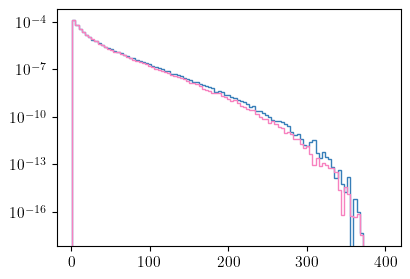

In [177]:
_=plt.hist(CHARM_df_ll.p4_daughter2[:,0], bins=np.linspace(1, 400, 100), weights=CHARM_df_ll.weights, histtype='step', label='low n, low b')
_=plt.hist(CHARM_df_hh.p4_daughter2[:,0], bins=np.linspace(1, 400, 100), weights=CHARM_df_hh.weights, histtype='step', label='high n, high b')
plt.semilogy()
# plt.ylim(1e-8, 2e-1)

In [ ]:
BR_D_to_tau = 0.056 # Ds -> tau branching ratio
frag_frac = 0.08 # Fragmentation fraction 
xsec_tot =  # mbar -- total pp x section

xsec_ccbar_low = 2.8e-3 - # mbar -- ccbar prod x section
xsec_ccbar_central = 4.6e-3  # mbar -- ccbar prod x section
xsec_ccbar_high = 6.4e-3 # mbar -- ccbar prod x section

low_normalization = BR_D_to_tau * frag_frac * xsec_ccbar_low / xsec_tot
central_normalization = BR_D_to_tau * frag_frac * xsec_ccbar_central / xsec_tot
high_normalization = BR_D_to_tau * frag_frac * xsec_ccbar_high / xsec_tot

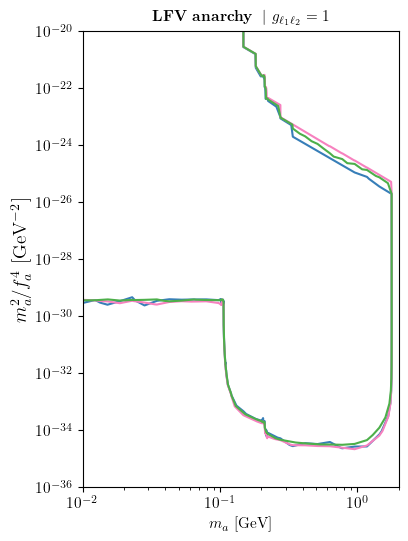

In [215]:
from alp.plot_tools import *

fig, ax = std_fig(figsize=(4, 6))
name = 'anarchy'
lamb = 1
c_lepton = np.array([[1, lamb, lamb], 
                     [lamb, 1, lamb],
                     [lamb, lamb, 1]
                     ])

# plot_other_limits(ax, c_lepton=c_lepton, c_NN=0, mN=0, linewidth=0.5, annotate=False)

# labels for legend
labels = []
labelnames = []
fa_power=4

Nsig = 2.3
X, Y, Z = np.load(f"data/NOVA_nhigh_bhigh_rates.npy", allow_pickle=True)
c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='None')
x_high, y_high = c.get_paths()[0].vertices.T

X, Y, Z = np.load(f"data/NOVA_nlow_blow_rates.npy", allow_pickle=True)
c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='None')
x_low, y_low = c.get_paths()[0].vertices.T

X, Y, Z = np.load(f"data/NOVA_pythia8_rates.npy", allow_pickle=True)
c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='None')
x_pythia, y_pythia = c.get_paths()[0].vertices.T

plt.plot(x_high, y_high*x_high**2, color='C0', label=r'NOvA $n_{high} b_{high}$')
plt.plot(x_low, y_low*x_low**2, color='C1', label=r'NOvA $n_{high} b_{low}$')
plt.plot(x_pythia, y_pythia*x_pythia**2, color='C2', label=r'NOvA Pythia8')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(rf"$m_a^2 / f_a^{{{fa_power}}}$ [GeV$^{{{-fa_power+2}}}$]", fontsize=14)
ax.set_xlabel(r"$m_a$ [GeV]")

title = r"{\bf LFV anarchy} $\,\,\vert\,\,$"
# ax.annotate(r'\noindent \bf LFV anarchy', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11, ha='left', va='top')
title += rf"$g_{{\ell_1 \ell_2}} = {int(c_lepton[0,0])}$"
ax.set_title(title, fontsize=11, pad=7.5)
# 

ax.set_ylim((1e-9)**fa_power, (1e-5)**fa_power)
ax.set_xlim(1e-2,2)
fig.savefig('plots/ALP_anarchy_uncertainty.pdf', bbox_inches='tight', dpi=300)